Gradient Descent
===

Gradient Descent is a method of reaching a minima of a function. It's a method to find the minima (global or local) of a given function. Guaranteed to find a minima for convex functions. General algorithm is given a function to minimize, you take a step towards the negative of the derivative of the function. If you keep doing it then eventually you'll reach a minima.

The number of steps taken to reach the minima depends on learning rate ($\alpha$). The larger the value of $\alpha$, the bigger the steps will be and it'll find the minima quickly. Opposite is also true: smaller the $\alpha$, the smaller the steps will be and it'll take more time to reach minima. You have to find a balance though, because of a bigger $\alpha$, gradient descent might fail to converge and a smaller $\alpha$ will find a more accurate minima, but at the same time will take more time to converge.

Number of iterations parameter tells the gradient descent how many steps to go. There might be cases where it is caught in an infinite loop: either it's diverging or minima is at infinity. So to prevent that from happening gradient descent will stop after a set number of iterations.


## Parameters:

1. Learning Rate ($\alpha$)
2. Number of Iterations



In [728]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets

%matplotlib inline

In [729]:
def init_params(params):
    thetas = np.random.rand(1, params)
    return thetas

In [736]:
def grad_desc_step(x, y, thetas, alpha):
    """
    Updates the parameters once.
    """
    # Calculate the gradient
    grad = cost_func_grad(x, y, thetas)

    # updating the parameters
    thetas = thetas - alpha * grad
    return thetas


def grad_desc(x, y, thetas, alpha=0.01, num_iters=100):
    """
    Gradient descent loop
    """
    # adds bias (=1) column to the input data
    x = np.hstack((np.ones((x.shape[0], 1)), x))
    
    # empty arrays to store thetas and costs
    theta_updates = np.zeros((num_iters, thetas.shape[1]))
    costs = np.zeros(num_iters)

    theta_updates[0] = thetas[:, 0]
    costs[0] = cost_func(x, y, thetas)

    # gradient descent loop
    for i in range(1, num_iters+1):
        thetas = grad_desc_step(x, y, thetas, alpha)
        cur_cost = cost_func(x, y, thetas)
        
        theta_updates[i] = thetas
        costs[i] = cur_cost
        
        if abs(costs[i] - costs[i-1]) < 1e-3:
            break
    
    return theta_updates[:i-1,:], costs[:i-1]


## Linear Regression

In [643]:
x = 2 * np.random.rand(100, 2)
x.shape

(100, 2)

In [644]:
y = 9 + 3 * x[:, 0].reshape(100, 1) + 4 * x[:, 1].reshape(100, 1) + np.random.randn(100, 1)
y.shape

(100, 1)

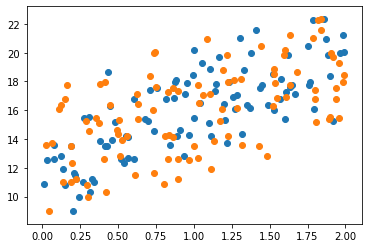

In [645]:
_ = plt.scatter(x[:, 1], y)
_ = plt.scatter(x[:, 0], y)

In [646]:
def func(x, thetas):
    """
    Linear hypothesis
    """
    return x.dot(thetas.T)

In [647]:
def cost_func(x, y, thetas):
    """
    MSE: (1 / 2*m) * sum((theta*x - y)^2)
    """
    preds = func(x, thetas)
    residual_sq = np.square(preds - y)
    cost = 0.5 * residual_sq.mean()
    return cost


In [648]:
def cost_func_grad(x, y, thetas):
    """
    Derivative of MSE: (1/m)*sum((theta*x - y)*x)
    """
    m = x.shape[0]
    preds = func(x, thetas)
    residuals = preds - y
    grad = x.T.dot(residuals) / m
    return grad.T


In [390]:
iters = 200
thetas = init_params(3)
thes, costs = grad_desc(x, y, thetas, 0.005, iters)

print(thes[-1])
print(costs[-1])

[4.9510588  4.82847433 5.32824682]
1.564249181032223


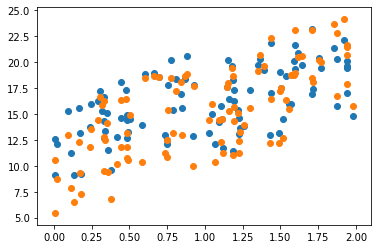

In [391]:
_ = plt.scatter(x[:, 0], y)
# _ = plt.scatter(x[:, 1], y)
_ = plt.scatter(x[:, 0], func(np.hstack((np.ones((x.shape[0], 1)), x)), thes[-1]))

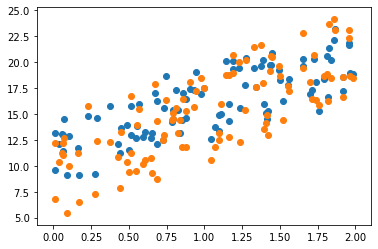

In [395]:
_ = plt.scatter(x[:, 1], y)
# _ = plt.scatter(x[:, 1], y)
_ = plt.scatter(x[:, 1], func(np.hstack((np.ones((x.shape[0], 1)), x)), thes[-1]))

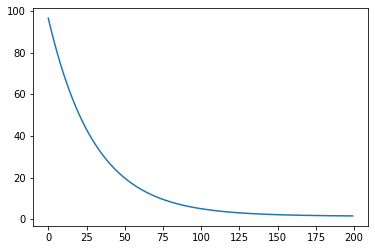

In [392]:
_ = plt.plot(range(iters), costs)

## Logistic Classification

In [655]:
iris = datasets.load_iris()

In [656]:
iris.data.shape

(150, 4)

In [669]:
ind = iris.target != 2
x = iris.data[ind, :]
x.shape

(100, 4)

In [670]:
y = iris.target[ind].reshape(-1, 1)
y.shape

(100, 1)

In [672]:
def func(x, thetas):
    """
    Logistic hypothesis function
    """
    lin = x.dot(thetas.T)
    pred = 1. / (1. + np.exp(-lin))
    return pred
    

In [673]:
def cost_func(x, y, thetas):
    """
    log loss cost function: -(1/m)*sum[log(h_hat) * y + log(1-h_hat) * (1-y)]
    """
    m = x.shape[0]
    preds = func(x, thetas)
#     print(preds.shape, y.shape)
    cost1 = -y.T.dot(np.log(preds))
#     print(cost1.shape)
    cost2 = -(1-y).T.dot(np.log(1 - preds))
#     print(cost2.shape)
#     print((preds < 1e-3).sum(), (preds > 1).sum(), (costs1 < 1e-3).sum(), (costs1 > 1).sum())
    return (cost1 + cost2).sum() / m


In [674]:
def cost_func_grad(x, y, thetas):
    """
    log loss derivative: (1/m) * sum[ (h_hat - y) * x ]
    """
    m = x.shape[0]
    pred = func(x, thetas)
    residuals = pred - y
    grad = x.T.dot(residuals) / m
    return grad.T


In [731]:
iters = 200
thetas = init_params(5)
thes, costs = grad_desc(x, y, thetas, 0.005, iters)

print(thes[-1])
print(costs[-1])

[ 0.26480139 -0.12492984 -0.17448131  0.16171046  0.88384227]
0.40901751881958914


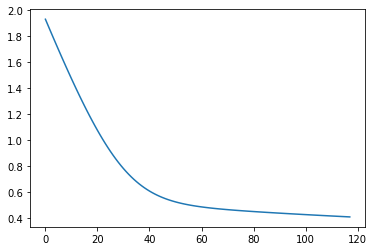

In [733]:
_ = plt.plot(range(costs.shape[0]), costs)

In [734]:
y_hat = func(np.hstack((np.ones((x.shape[0], 1)), x)), thes[-1])
y_hat = np.where(y_hat > 0.5, 1, 0)
y_hat.shape

(100,)

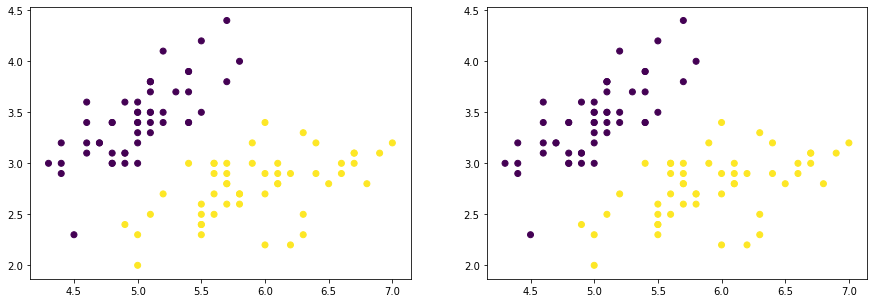

In [735]:
fix, ax = plt.subplots(1, 2, figsize=(15, 5))

_ = ax[0].scatter(x[:, 0], x[:, 1], c=y.reshape(-1))
_ = ax[1].scatter(x[:, 0], x[:, 1], c=y_hat.reshape(-1))

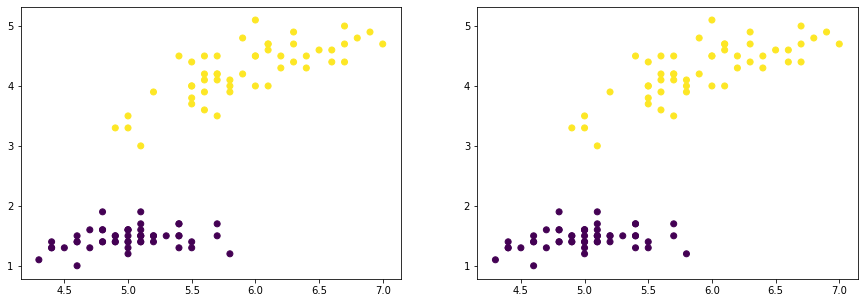

In [717]:
fix, ax = plt.subplots(1, 2, figsize=(15, 5))

_ = ax[0].scatter(x[:, 0], x[:, 2], c=y.reshape(-1))
_ = ax[1].scatter(x[:, 0], x[:, 2], c=y_hat.reshape(-1))

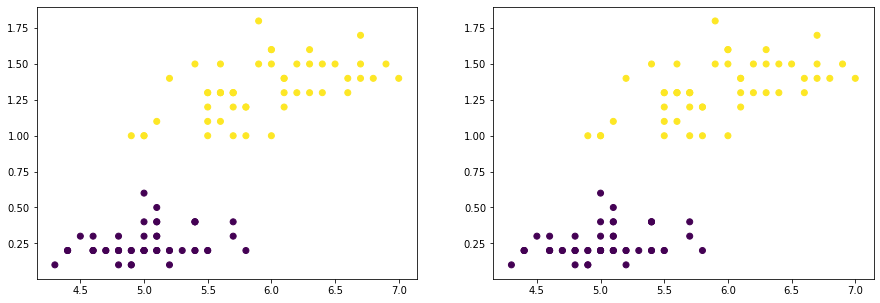

In [718]:
fix, ax = plt.subplots(1, 2, figsize=(15, 5))

_ = ax[0].scatter(x[:, 0], x[:, 3], c=y.reshape(-1))
_ = ax[1].scatter(x[:, 0], x[:, 3], c=y_hat.reshape(-1))

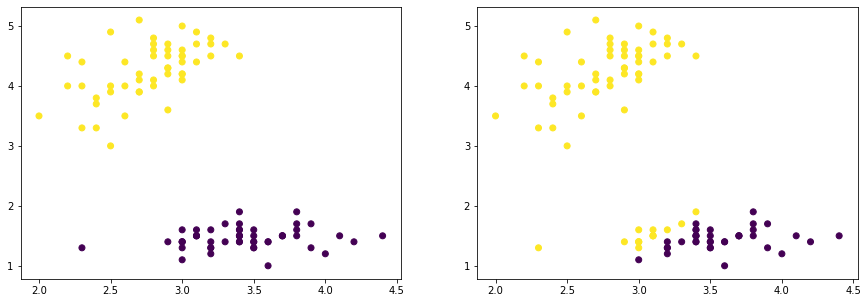

In [711]:
fix, ax = plt.subplots(1, 2, figsize=(15, 5))

_ = ax[0].scatter(x[:, 1], x[:, 2], c=y.reshape(-1))
_ = ax[1].scatter(x[:, 1], x[:, 2], c=y_hat.reshape(-1))

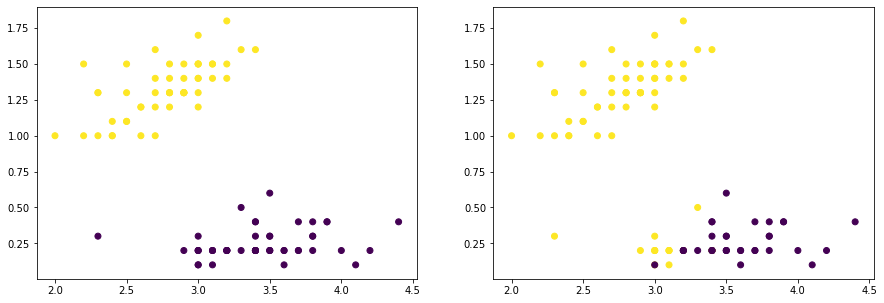

In [712]:
fix, ax = plt.subplots(1, 2, figsize=(15, 5))

_ = ax[0].scatter(x[:, 1], x[:, 3], c=y.reshape(-1))
_ = ax[1].scatter(x[:, 1], x[:, 3], c=y_hat.reshape(-1))

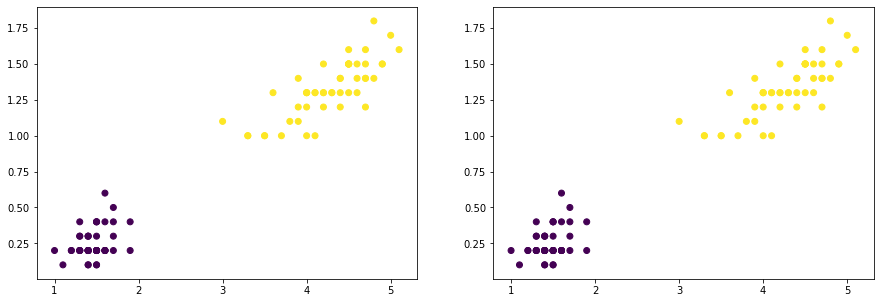

In [683]:
fix, ax = plt.subplots(1, 2, figsize=(15, 5))

_ = ax[0].scatter(x[:, 2], x[:, 3], c=y.reshape(-1))
_ = ax[1].scatter(x[:, 2], x[:, 3], c=y_hat.reshape(-1))